**About Netflix:**<br>
Netflix, established in 1997, has evolved from a DVD rental service to a premier online streaming platform offering an extensive array of TV shows, films, and documentaries. Renowned for its vast library, Netflix provides subscribers with unlimited access to content, accessible across various devices like smart TVs, laptops, and smartphones. Notably, Netflix is renowned for its original productions like "Stranger Things" and "The Crown," alongside licensed content. Operating in over 190 countries, Netflix has reshaped entertainment consumption worldwide, captivating millions of subscribers globally.

**Description of each column in the dataset:** <br>
**show_id:** Gives the information about show id.<br>
**type:** Gives information about 2 different unique values one is TV Show and another is Movie.<br>
**title:** Gives information about the title of Movie or TV Show.<br>
**director:** Gives information about the director who directed the Movie or TV Show.<br>
**cast:** Gives information about the cast who plays role in Movie or TV Show.<br>
**country:** Gives information about the Name of country.<br>
**date_added:** Gives information about the tv shows or movie released.<br>
**release_year:** Gives information about the year when Movie or TV Show was released.<br>
**rating:** Gives information about the Movie or TV Show are in which category (eg like the movies are only for students, or adults, etc).<br>
**duration:** Gives information about the duration of Movie or TV Show.<br>
**listed_in:** Gives information about the genre of Movie or TV Show.<br>
**description:** Gives information about the description of Movie or TV Show.<br>

**Business Problem** <br>
To analyze the data and generate insights that could help Netflix deciding which type of shows/movies to produce and how they can grow the business in different countries.<br>
To develop a movie and TV show recommendation function, users should have the capability to search for a specific movie or TV show by its name. Upon entering the title, the system should generate recommendations based on similar content. 

To achieve the desired solution, a recommendation system will be developed by following these steps.

1. **Data Understanding:**
  - The initial stage involves comprehending the dataset. In this project, there are 12 variables, six of which contain missing values.

2. **Univariate Exploratory Data Analysis (EDA):**
  - Conduct an in-depth analysis of individual variables within the dataset to gain insights and understand their distributions and characteristics.

3. **Data Preparation:**
  - Prepare the dataset for analysis by addressing missing values, handling categorical variables, and performing any necessary transformations or preprocessing steps.

4. **Recommendation System with Cosine Similarity:**
  - Implement a recommendation system using cosine similarity.
  - This method utilizes text similarity between titles and descriptions to recommend similar titles.
  - It involves vectorizing the text data and calculating the similarity between vectors.
  - To obtain title recommendations, select the title with the highest similarity score and retrieve the corresponding TV series or movie title along with its description.

#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import pandas_profiling
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
df = pd.read_csv(r'C:\Users\user\Downloads\Compressed\netflix_data.csv\netflix_data.csv')

In [3]:
def analyze_dataframe(df):
    
    print('DataFrame Shape:')
    print('-'*15)
    print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')
    print('\n')

    print('DataFrame Information:')
    print('-'*22)
    display(df.info())
    print('\n')
    
    print('Number of Unique Values:')
    print('-'*25)
    display(df.nunique())
    print('\n')
    
    print('DataFrame Sample:')
    print('-'*15)
    display(df.sample(8))
    print('\n')

    print('DataFrame Description:')
    print('-'*22)
    display(df.describe(include='all').T)
    print('\n')

    print('Number of Missing Rows:')
    print('-'*22)
    m=df.isnull().sum()
    print(m[m>0])
    print('\n')

    print('Number of Duplicated Rows:')
    print('-'*25)
    display(df.duplicated().sum())
    print('\n')

analyze_dataframe(df)

DataFrame Shape:
---------------
Rows: 8807, Columns: 12


DataFrame Information:
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


None



Number of Unique Values:
-------------------------


show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64



DataFrame Sample:
---------------


show_id     type                                              title  \
2282   s2283    Movie                                         One by Two   
2539   s2540    Movie                                  Fire in the Blood   
2128   s2129    Movie  Beyond the Boundary: ICC Women's T20 World Cup...   
8377   s8378    Movie                                  The King's Speech   
3746   s3747  TV Show                                         Black Spot   
2675   s2676  TV Show                                    Fary : Hexagone   
6784   s6785    Movie                                   Forbidden Planet   
2072   s2073    Movie                                          Sex Drive   

                       director  \
2282              Devika Bhagat   
2539           Dylan Mohan Gray   
2128                 Anna Stone   
8377                 Tom Hooper   
3746                        NaN   
2675  Adrien Lagier, Ousmane Ly   
6784             Fred M. Wilcox   
2072                Sean Anders   

                                                   cast  \
2282  Abhay Deol, Preeti Desai, Lillete Dubey, Rati ...   
2539                                       William Hurt   
2128                                                NaN   
8377  Colin Firth, Geoffrey Rush, Helena Bonham Cart...   
3746  Suliane Brahim, Hubert Delattre, Laurent Capel...   
2675                                               Fary   
6784  Leslie Nielsen, Walter Pidgeon, Anne Francis, ...   
2072  Josh Zuckerman, Amanda Crew, Clark Duke, Seth ...   

                                       country         date_added  \
2282                                     India       July 5, 2020   
2539                                     India       May 13, 2020   
2128                                       NaN    August 14, 2020   
8377  United Kingdom, United States, Australia       June 2, 2018   
3746                           France, Belgium      June 14, 2019   
2675                                    France     April 16, 2020   
6784                             United States   November 1, 2019   
2072                             United States  September 1, 2020   

      release_year rating   duration  \
2282          2014  TV-14    135 min   
2539          2012  TV-14     83 min   
2128          2020   TV-G     59 min   
8377          2010      R    118 min   
3746          2019  TV-MA  2 Seasons   
2675          2020  TV-MA  2 Seasons   
6784          1956      G     98 min   
2072          2008      R    109 min   

                                              listed_in  \
2282             Comedies, Dramas, International Movies   
2539                Documentaries, International Movies   
2128  Documentaries, International Movies, Sports Mo...   
8377                       Dramas, International Movies   
3746  Crime TV Shows, International TV Shows, TV Dramas   
2675  International TV Shows, Stand-Up Comedy & Talk...   
6784  Action & Adventure, Classic Movies, Sci-Fi & F...   
2072                                           Comedies   

                                            description  
2282  The lives of a Mumbai man and woman who are bo...  
2539  Dylan Mohan Gray examines Africa's AIDS crisis...  
2128  With highlights from the 2020 tourney, this pr...  
8377  In this biographical drama, Britain's King Geo...  
3746  A police chief and an eccentric new prosecutor...  
2675  French comedy phenom Fary puts a playful spin ...  
6784  A pulp-fiction sci-fi classic, Forbidden Plane...  
2072  Eager to hook up with a woman he met online, 1...



DataFrame Description:
----------------------


count unique  \
show_id         8807   8807   
type            8807      2   
title           8807   8807   
director        6173   4528   
cast            7982   7692   
country         7976    748   
date_added      8797   1767   
release_year  8807.0    NaN   
rating          8803     17   
duration        8804    220   
listed_in       8807    514   
description     8807   8775   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  6131   
title                                      Dick Johnson Is Dead     1   
director                                          Rajiv Chilaka    19   
cast                                         David Attenborough    19   
country                                           United States  2818   
date_added                                      January 1, 2020   109   
release_year                                                NaN   NaN   
rating                                                    TV-MA  3207   
duration                                               1 Season  1793   
listed_in                          Dramas, International Movies   362   
description   Paranormal activity at a lush, abandoned prope...     4   

                     mean       std     min     25%     50%     75%     max  
show_id               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                  NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                  NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2014.180198  8.819312  1925.0  2013.0  2017.0  2019.0  2021.0  
rating                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description           NaN       NaN     NaN     NaN     NaN     NaN     NaN



Number of Missing Rows:
----------------------
director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


Number of Duplicated Rows:
-------------------------


0

1. **Data Overview**: The dataset contains information on 8807 entries, including unique identifiers, movie titles, directors, cast members, countries of production, and more.
2. **Content Type Distribution**: The majority of entries are movies, comprising 6131 out of 8807, with the rest being TV shows.
3. **Variety in Directors**: There are 4528 unique directors, with the most prolific being Rajiv Chilaka with 19 entries.
4. **Diverse Cast Members**: The dataset includes 7692 unique cast members, with David Attenborough being one of the most frequent with 19 appearances.
5. **Release Years**: The release years range from 1925 to 2021, with a mean of 2014.18, indicating a diverse collection of content spanning nearly a century.
6. **Rating and Duration**: The ratings span 17 categories, with "TV-MA" being the most frequent, while durations range from a single season to unspecified lengths, reflecting the varied nature of the content.
7. **Missing value**: It highlights the number of missing rows for specific attributes such as director, cast, country, date added, rating, and duration. The largest number of missing rows is observed for the director column, followed by cast, country, date added, rating, and duration.

In [4]:
print('Unique Duration:', df['duration'].unique())
print('-'*70)
print('Unique Rating:', df['rating'].unique())
print('-'*60)

Unique Duration: ['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '189 min' '141 min' '130 min' '138 min' '81 min' '132 min' '10 Seasons'
 '123 min' '65 min' '68 min' '66 min' '62 min' '74 min' '131 min

Three incorrect values were identified in the rating column, prompting the need for further examination of the duration and description columns to ensure data accuracy and consistency. 

In [5]:
pd.set_option('display.max_colwidth', None)
filtered_df = df[df['rating'].isin(['74 min', '84 min', '66 min'])]
filtered_df

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in  \
5541      NaN    Movies   
5794      NaN    Movies   
5813      NaN    Movies   

                                                                                                                                               description  
5541            Louis C.K. muses on religion, eternal love, giving dogs drugs, email fights, teachers and more in a live performance from Washington, D.C.  
5794     Emmy-winning comedy writer Louis C.K. brings his caustic wit to Milwaukee, offering up his unique and uncensored take on sex, parenting and more.  
5813  The comic puts his trademark hilarious/thought-provoking spin on finding a bat in his kitchen, seeing rats having sex, Boston accents and dead pets.

Based on movie descriptions, we can infer or estimate ratings by analyzing the description context and replace rating value to duration.

In [6]:
df.loc[df['rating'].isin(['74 min', '84 min', '66 min']), 'duration'] = df['rating']
df['rating'] = df['rating'].replace(['74 min', '84 min', '66 min'], 'TV-MA')
print('Unique Rating:', df['rating'].unique())

Unique Rating: ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' nan 'TV-Y7-FV' 'UR']


#### Working with missing values

- The 'date_added' column is filled with the most common release year followed by "January 1" for missing values.
- Missing 'rating' values are replaced with the most common rating in the dataset.
- For 'director', 'cast', and 'country', missing values are filled with "NoDataAvailable" to indicate the absence of information. 

In [7]:
df['date_added']=df['date_added'].fillna('January 1, {}'.format(str(df['release_year'].mode()[0])))
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df[['director','cast','country']] = df[['director','cast','country']].fillna('NoDataAvailable')

In [8]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### Data Manupulation

In [9]:
print(f"Oldest Added Date: {df['date_added'].min()}")
print(f"Newest Added Date: {df['date_added'].max()}")
print(f"Oldest Release Year: {df['release_year'].min()}")
print(f"Newest Release Year: {df['release_year'].max()}")

Oldest Added Date:  April 15, 2018
Newest Added Date: September 9, 2021
Oldest Release Year: 1925
Newest Release Year: 2021


Extracts the numerical value from the 'duration' column by splitting at the space character.<br>
The 'date_added' column is transformed into datetime format, likely for chronological analysis or time-based operations.

In [10]:
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))
df["date_added"] = pd.to_datetime(df['date_added'])

Replace certain country names like 'United States' with 'USA', 'United Kingdom' with 'UK', and 'South Korea' with 'S. Korea'.

In [11]:
df['country'].replace({'United States': 'USA', 
                       'United Kingdom': 'UK', 
                       'South Korea': 'S. Korea'}, regex=True, inplace=True)

**Custom Color Palette**

In [12]:
custom_palette_1 = ['#660000',  '#a60606']
custom_palette_2 = [ '#a60606',   '#FF7276']
custom_palette_3 =['#ff4040','#F62217', '#FF0000','#B21807','#800000']
custom_palette_4 =['#660000', '#B21807', '#FF0000' , '#ff4040']

#### Content Distribution in Netflix

In [13]:
type_count = df['type'].value_counts().reset_index()

fig = px.pie(type_count,values='type',names='index', 
             color_discrete_sequence=px.colors.sequential.RdBu, hole = 0.55)
fig.update_traces(textposition='inside', 
                  textinfo='percent+value+label')
fig.add_annotation(x= 0.5, y = 0.5,text = 'Content Distribution',
                   font = dict(size=20,family='Verdana', color='#6a040f'),
                   showarrow = False)
fig.update_layout(showlegend=False)
fig.show()

It illustrates a dominant presence of movies, comprising 69.62%, with TV shows at 30.38%, hinting at varied content preferences.

**Top Countries with the Highest Number of Shows**

In [14]:
filtered_df = df[~(df['country'] == 'NoDataAvailable')]
country_list = filtered_df['country'].str.split(', ')
country_b_list = {}
for countries in country_list:
    for country in countries:
        if (country in country_b_list):
            country_b_list[country] += 1
        else:
            country_b_list[country] = 1
df_country = pd.DataFrame(country_b_list.values(), index=country_b_list.keys(),
                        columns={'title_counts'})
df_country.sort_values(by='title_counts', ascending=False, inplace=True)
top_15_country = df_country[0:15] 
fig = px.bar(x=top_15_country.index,
             y=top_15_country['title_counts'],
             text=top_15_country['title_counts'], 
             title='Top 15 Countries with the Highest Number of Shows',
             labels={'y': 'Number of Titles', 'x': 'Country'},
             width=1000,
             height=500,
             color_discrete_sequence=custom_palette_2)

fig.update_layout(title_font_size=16, title_x=0.5, xaxis_title_font_size=14,
                  yaxis_title_font_size=14, showlegend=False, 
                  plot_bgcolor='#ffffff'
                 )
fig.update_traces(textposition='outside', textfont=dict(size=11))
fig.show()

USA dominates with 3689 titles, followed by India with 1046 titles.UK, Canada, and France also contribute significantly, with 804, 445, and 393 titles respectively. Asian countries like Japan and South Korea have notable contributions, with 318 and 231 titles respectively.

**Content Added Over the Year**

In [15]:
filtered_df = df.dropna(subset=['release_year'])
filtered_df = filtered_df[filtered_df['release_year'] > 2000]
release_year_counts = filtered_df['release_year'].value_counts()

fig = px.bar(release_year_counts, 
             title='Content Added Over the Year (After 2000)',
             labels={'value': 'Count', 'index': 'Year'},
             text=release_year_counts,
             width=800,
             height=500,
             color=release_year_counts.index,
             color_continuous_scale=px.colors.sequential.Reds)

fig.update_layout(title_font_size=16, title_x=0.5, 
                  xaxis_title_font_size=14, 
                  yaxis_title_font_size=14, showlegend=False, 
                  plot_bgcolor='#ffffff',
                  xaxis=dict(tickfont=dict(size=12),tickmode='linear', dtick=1),
                  yaxis=dict(tickfont=dict(size=12)),
                  font=dict(size=14),
                  coloraxis_showscale=False,
                  width=1000, height=600)
fig.update_traces(textposition='outside',textfont=dict(size=11))
fig.show()

The years 2018 and 2017 saw the highest number of show releases, with 1147 and 1032 respectively, indicating a peak in content production. <br>
From 2012 to 2018, It shows a rapid expansion in the entertainment industry.

**Top 15 Directors by the Number of Shows Directed**

In [16]:
filtered_df = df[~(df['director'] == 'NoDataAvailable')]
top_15_directors = filtered_df['director'].value_counts().nlargest(15).sort_values()

fig = px.bar(top_15_directors, 
             orientation='h', 
             title='Top 15 Directors by Number of Shows Directed',
             labels={'value': 'Number of Shows Directed', 'index': 'Director'},
             width=900,
             height=600,
             color_discrete_sequence= custom_palette_2)

fig.update_layout(title_font_size=16, title_x=0.5, 
                  xaxis_title_font_size=14, 
                  yaxis_title_font_size=14, showlegend=False, 
                  plot_bgcolor='#ffffff')

fig.update_layout(xaxis=dict(gridcolor='#ffdab9',tickmode='linear', dtick=2))
fig.show()

Rajiv Chilaka and Raúl Campos, Jan Suter lead with 19 and 18 shows directed, respectively, showcasing their prolific output. Marcus Raboy and Suhas Kadav closely follow with 16 shows each, indicating their versatility and consistent contribution

**Top Genres Across all Shows**

In [17]:
genre_list = df['listed_in'].str.split(', ')
genre_counts = {}

for genres in genre_list:
    for genre in genres:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

df_genre = pd.DataFrame(genre_counts.values(), index=genre_counts.keys(), columns=['Genres_Count'])
df_genre.sort_values(by='Genres_Count', ascending=True, inplace=True)
top_20_genre = df_genre.tail(20)

fig = px.bar(x= top_20_genre['Genres_Count'],
             y=top_20_genre.index,
             text=top_20_genre['Genres_Count'], 
             orientation='h', 
             title='Top 20 Genres Across All Shows',
             labels={'x': 'Number of Shows', 'y': 'Genre'},
             width=900,
             height=650,
             color_discrete_sequence=custom_palette_2)

fig.update_layout(title_font_size=16, title_x=0.5, 
                  xaxis_title_font_size=14, 
                  yaxis_title_font_size=14, 
                  showlegend=False, 
                  plot_bgcolor='#ffffff')

fig.update_traces(textposition='outside', textfont=dict(size=11))
fig.show()

**International Movies** and **Dramas** stand out as the most frequent genres, with 2752 and 2427 counts, respectively.  **Comedies** and **International TV Shows** follow closely, indicating a significant viewership interest in these genres. 

**Number of Movies Released After 2000: A Yearly Breakdown**

In [18]:
df_movies_after_2000 = df[(df['type'] == 'Movie') & (df['release_year'] > 2000)]
movie_count_by_year = df_movies_after_2000['release_year'].value_counts().sort_index()

fig = px.bar(x=movie_count_by_year.index, y=movie_count_by_year.values, 
             labels={'x': 'Year', 'y': 'Movie Count'}, 
             title='Number of Movies Released After 2000',
             color=movie_count_by_year.index,
             color_continuous_scale=px.colors.sequential.Reds)

fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=movie_count_by_year.index), 
    yaxis=dict(gridcolor='#ffdab9'), 
    title_font_family='Verdana',  
    title_font_size=16, 
    title_x=0.5, 
    coloraxis_showscale=False,
    width=1000, height=600,
    plot_bgcolor='#ffffff' 
                )
fig.show()

The number of movies released after 2000 shows a gradual increase over the years, with a significant surge in production observed from 2015 to 2018.<br>
Interestingly, while the number of movies released remained same in 2017 and 2018, there was a noticeable decline in 2019 and 2020. This trend suggests a potential shift in the film industry landscape.

**Number of TV Shows Released After 2000: A Yearly Breakdown**

In [19]:
df_tv_shows_after_2000 = df[(df['type'] == 'TV Show') & (df['release_year'] > 2000)]
tv_show_count_by_year = df_tv_shows_after_2000['release_year'].value_counts().sort_index()

fig = px.bar(x=tv_show_count_by_year.index, y=tv_show_count_by_year.values, 
             labels={'x': 'Year', 'y': 'TV Show Count'}, 
             title='Number of TV Shows Released After 2000',
             color=tv_show_count_by_year.index,
             color_continuous_scale=px.colors.sequential.Reds)
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=movie_count_by_year.index), 
    yaxis=dict(gridcolor='#ffdab9'),  
    title_font_family='Verdana',  
    title_font_size=16,  
    title_x=0.5,  
    coloraxis_showscale=False, 
    width=1000, height=600,
    plot_bgcolor='#ffffff'  
            )
fig.show()

The number of TV shows released after 2000 exhibited a notable upward trend. Starting with only 5 shows in 2001, the count gradually increased, peaking at 436 in 2020, indicating a significant surge in content creation over the years, with some fluctuations in between. This exponential growth reflects the expanding landscape of television entertainment post-2000.

**Top 10 Countries with the Highest Number of Movies & TV Shows**

In [20]:
# Filter TV shows and extract countries
filtered_tv_shows = df[(df['type'] == 'TV Show') & ~(df['country'] == 'NoDataAvailable')]
tv_country_list = filtered_tv_shows['country'].str.split(', ')
tv_country_counts = {}
for countries in tv_country_list:
    for country in countries:
        if country in tv_country_counts:
            tv_country_counts[country] += 1
        else:
            tv_country_counts[country] = 1

# Create DataFrame for TV show countries
df_tv_country = pd.DataFrame(tv_country_counts.values(), index=tv_country_counts.keys(),
                              columns={'title_counts'})
df_tv_country.sort_values(by='title_counts', ascending=False, inplace=True)
top_10_tv_country = df_tv_country.head(10)

# Plot top 10 TV show countries
fig_tv = px.bar(x=top_10_tv_country.index,
                y=top_10_tv_country['title_counts'],
                text=top_10_tv_country['title_counts'],
                title='Top 10 Countries with the Highest Number of TV Shows',
                labels={'y': 'Number of TV Shows', 'x': 'Country'},
                width=750,
                height=440,
                color_discrete_sequence=custom_palette_2)

# Customize TV show layout
fig_tv.update_layout(title_font_size=16, title_x=0.5,
                     xaxis_title_font_size=14,
                     yaxis_title_font_size=14,
                     showlegend=False,
                     plot_bgcolor='#ffffff')
fig_tv.update_traces(textposition='outside', textfont=dict(size=11))

# Filter movies and extract countries
df_movies = df[df['type'] == 'Movie']
filtered_movies = df_movies[~(df_movies['country'] == 'NoDataAvailable')]
movie_country_list = filtered_movies['country'].str.split(', ')
movie_country_counts = {}
for countries in movie_country_list:
    for country in countries:
        if country in movie_country_counts:
            movie_country_counts[country] += 1
        else:
            movie_country_counts[country] = 1

# Create DataFrame for movie countries
df_movie_country = pd.DataFrame(movie_country_counts.values(), index=movie_country_counts.keys(),
                                columns={'title_counts'})
df_movie_country.sort_values(by='title_counts', ascending=False, inplace=True)
top_10_movie_country = df_movie_country.head(10)

# Plot top 10 movie countries
fig_movie = px.bar(x=top_10_movie_country.index,
                   y=top_10_movie_country['title_counts'],
                   text=top_10_movie_country['title_counts'],
                   title='Top 10 Countries with the Highest Number of Movies',
                   labels={'y': 'Number of Movies', 'x': 'Country'},
                   width=750,
                   height=440,
                   color_discrete_sequence=custom_palette_2)

# Customize movie layout
fig_movie.update_layout(title_font_size=16, title_x=0.5,
                        xaxis_title_font_size=14,
                        yaxis_title_font_size=14,
                        showlegend=False,
                        plot_bgcolor='#ffffff')
fig_movie.update_traces(textposition='outside', textfont=dict(size=11))

# Show both graphs
fig_tv.show()
fig_movie.show()

The USA dominates both mediums, with 2751 movies and 938 TV shows. India stands out as a significant contributor, offering 962 movies and 84 TV shows. While the UK plays a strong role in both categories, Japan's presence is more pronounced in TV shows, with 199 entries, reflecting a distinct cultural influence. Korea follows closely, demonstrating its rising influence in television production with 170 entries.

**Domestic and International Content Percentage**

In [21]:
country_type = df[['type', 'country']]
country_type['num_country'] = country_type['country'].apply(lambda x: len(x.split(',')))
country_type['bin_country'] = country_type['num_country'].apply(lambda x: 1 if x >= 2 else 0)

# Calculate percentages for TV Shows and Movies
tv_percent = country_type[country_type['type'] == 'TV Show']['bin_country'].value_counts(normalize=True) * 100
movie_percent = country_type[country_type['type'] == 'Movie']['bin_country'].value_counts(normalize=True) * 100

# Create pie chart for TV Shows
fig_tv = px.pie(names=tv_percent.index,
                values=tv_percent.values,
                title='Domestic vs International TV Shows',
                width=500, height=500,
                color_discrete_sequence=custom_palette_4, hole=0.55)

# Update legend labels for TV Shows
fig_tv.update_traces(legendgroup='bin_country', labels=['Domestic', 'International'], textposition='inside', textinfo='percent+label')
fig_tv.update_layout(title_x=0.5, showlegend=False)

# Create pie chart for Movies
fig_movie = px.pie(names=movie_percent.index,
                    values=movie_percent.values,
                    title='Domestic vs International Movies',
                    width=500, height=500,
                    color_discrete_sequence=custom_palette_4, hole=0.55)

# Update legend labels for Movies
fig_movie.update_traces(legendgroup='bin_country', labels=['Domestic', 'International'], textposition='inside', textinfo='percent+label')
fig_movie.update_layout(title_x=0.5, showlegend=False)

fig_tv.show()
fig_movie.show()

Majority of TV Shows are domestic, comprising 90.84%, while international shows represent only 9.16%. However, for movies, domestic productions account for 82.47%, while international movies make up 17.53% of the total.

**Contents Duration Analysis**

**Average Movie Duration Lineplot from 1940 to 2021**

In [22]:
df_tv_shows = df[df['type'] == 'TV Show']
df_movies = df[df['type'] == 'Movie']

In [23]:
average_duration_by_year = df_movies.groupby('release_year')['duration'].mean().reset_index()

fig = px.line(average_duration_by_year, x='release_year', y='duration', 
              labels={'release_year': 'Year', 'duration': 'Average Duration'}, 
              title='Average Movie Duration Over Years')

fig.update_layout(
    xaxis_title='Year', 
    yaxis_title='Average Duration (minutes)',
    plot_bgcolor='white', 
    title_font_size=16,  
    title_x=0.5,  
    height=600,  
    width=1000,  
    xaxis=dict( dtick=5), 
    #yaxis=dict(gridcolor='#ffdab9'),  
                )
fig.update_traces(line=dict(color='#67000d'))
fig.show()

- Movie duration varied across years, peaking in 1964 with an average of 200.5 minutes and dipping to 35 minutes in 1942.
- There's a noticeable fluctuation from 1964 to 1978, with some years experiencing longer durations than others.
- More recent years show a trend towards shorter average durations, with 2020 and 2021 having average durations of 92.1 and 96.4 minutes, respectively.

**Average Movie Duration for Top 15 Movie-making Countries**

In [24]:
filtered_missing_countries = df_movies[~(df_movies['country'] == 'NoDataAvailable')]
top_15_countries = list(filtered_missing_countries['country'].value_counts().index[:15])
df_top_15_movies = df_movies[df_movies['country'].isin(top_15_countries)]
top_15_duration_mean = df_top_15_movies.groupby('country')['duration'].mean()

df_top_15_duration_mean = top_15_duration_mean.reset_index()
df_top_15_duration_mean['duration'] = df_top_15_duration_mean['duration'].round().astype(int)

fig = px.line(df_top_15_duration_mean, x='country', y='duration', 
              title='Average Movie Duration for Top 15 Movie-making Countries',
              labels={'duration': 'Average Duration', 'country': 'Country'},
              text=df_top_15_duration_mean['duration'].astype(str),
              markers=True)

fig.update_layout(
    xaxis=dict(title='Country', tickangle=-30, gridcolor='#ffdab9'), 
    yaxis=dict(title='Average Duration (minutes)', gridcolor='#ffdab9'), 
    plot_bgcolor='white', 
    title_font_size=16, 
    title_x=0.5,  
    height=600, 
    width=1000  
              )
fig.update_traces(line=dict(color='#67000d'), textfont=dict(size=12), textposition='bottom right')
fig.show()

- India stands out with a longer duration of 127 minutes, Nigeria follows closely behind at 107 minutes. 
- Movies from Canada and the USA have comparatively shorter durations, averaging around 88 and 92 minutes, respectively.

**Movie Duration Distribution After 2000**

In [25]:
df_movies_after_2000 = df[(df['type'] == 'Movie') & (df['release_year'] > 2000)]

bins = [0, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, float('inf')]
labels = ['0-30 min', '30-40 min', '40-50 min', '50-60 min', '60-70 min', '70-80 min',
          '80-90 min', '90-100 min', '100-110 min', '110-120 min', '110-130 min', 
          '130-140 min', '140-150 min', '150+ min']
df_movies_after_2000['duration_category'] = pd.cut(df_movies_after_2000['duration'], 
                                                   bins=bins, labels=labels, right=False)
duration_counts = df_movies_after_2000['duration_category'].value_counts().sort_index()

duration_counts = duration_counts.sort_index()
fig = px.bar(x=duration_counts.index, y=duration_counts.values, 
             labels={'x': 'Duration Category', 'y': 'Count'}, 
             title='Movie Duration Distribution After 2000',
             color_discrete_sequence=["#800000"],  
             category_orders={'x': duration_counts.index},  
             )

fig.update_layout(
    xaxis_title='Duration Category',
    xaxis_tickangle=-30,
    yaxis_title='Count',
    plot_bgcolor='white',  
    bargap=0.1, 
    xaxis=dict(
        categoryorder='array',
        categoryarray=duration_counts.index,
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title_font=dict(size=14),  
        tickfont=dict(size=12),  
        gridcolor='#ffdab9',
        dtick=200
    ),
    title=dict(
        text='Movie Duration Distribution After 2000', 
        font=dict(size=16),  
        x=0.5  
    ),
    height=600, 
    width=1000,  
)
fig.show()

While shorter films under 90 minutes maintain popularity, there's a notable surge in movies ranging from 80 to 130 minutes. <br>
Films spanning 80-110 minutes dominate, suggesting a preference for concise storytelling.

**Number of Seasons Released in Most TV Shows**

In [26]:
top_10_duration = df_tv_shows['duration'].value_counts().head(10)

fig = px.bar(top_10_duration.reset_index(), 
             x='index', y='duration',
             title='Number of Seasons Released in Most of the TV Shows',
             labels={'index': 'Number of Seasons', 'duration': 'Number of Series'},
             color_discrete_sequence=custom_palette_2) 

fig.update_layout(xaxis_title_font_size=14, yaxis_title_font_size=14, title_font_size=16)
fig.update_traces(texttemplate='%{y}', textposition='outside')  
fig.update_layout(title_x=0.5, xaxis=dict(tickfont=dict(size=12), dtick=1), 
                  plot_bgcolor='#ffffff', coloraxis_showscale=False)
fig.show()

It's evident that the majority of TV shows consist of fewer seasons, with the highest count at 1 and a gradual decline as the number of seasons increases. The sharp drop after the first season indicates a common trend of shorter TV show durations.

**TV Show with Most Number of Season**

In [27]:
top_20_tv_shows = df_tv_shows[['title', 'duration']].sort_values(by='duration', ascending=False).head(20)

fig = px.bar(top_20_tv_shows, 
             x='duration', y='title',
             orientation='h',
             title='Top 20 TV Shows with the Most Number of Seasons',
             labels={'duration': 'Number of Seasons', 'title': 'TV Show Title'},
             color_discrete_sequence=custom_palette_2,
             height=700, width=950)  

fig.update_layout(plot_bgcolor='#ffffff', coloraxis_showscale=False, title_x=0.5, 
                  xaxis_title_font_size=14, yaxis_title_font_size=14, title_font_size=16,
                  xaxis_gridcolor='#ffdab9', yaxis=dict(autorange='reversed'),
                  xaxis=dict(dtick=2))
fig.show()

"Grey's Anatomy" tops with 17 seasons, followed by "Supernatural" and "NCIS," each with 15 seasons, signifying their enduring popularity and longevity in television.

**Director Analysis**

**Top 15 Movie Directors**

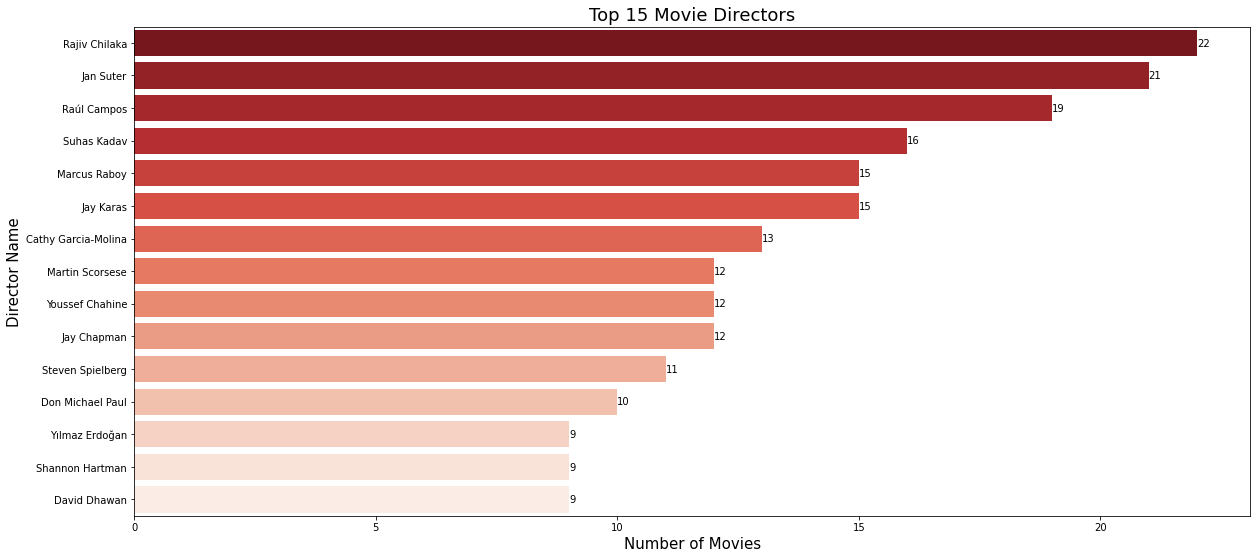

In [28]:
df_movie_director = df_movies.drop(df_movies[df_movies['director'] == 'NoDataAvailable'].index)

director_list = df_movie_director['director'].str.split(', ')
director_count = {}
for directors in director_list:
    for director in directors:
        if director in director_count:
            director_count[director] += 1 
        else:
            director_count[director] = 1

df_movie_director = pd.DataFrame(director_count.values(), 
                                 index=director_count.keys(), 
                                 columns={'director_count'})
df_movie_director.sort_values(by='director_count', ascending=False, inplace=True) 
top_15_movie_director = df_movie_director.head(15)


plt.figure(figsize=(20, 9))
ax = sns.barplot(y=top_15_movie_director.index, 
                 x=top_15_movie_director['director_count'],
                 palette='Reds_r')
ax.bar_label(ax.containers[0])
plt.title('Top 15 Movie Directors', fontsize=18)
plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('Director Name', fontsize=15)
plt.show()


The comparative analysis of top movie directors showcases Rajiv Chilaka as the most prolific, with 22 movies. Jan Suter and Raúl Campos follow closely with 21 and 19 movies, respectively. Suhas Kadav and Marcus Raboy stand out with 16 and 15 movies, respectively, highlighting the diversity in directorial output among the top directors.

**Top 15 TV_Show Directors**

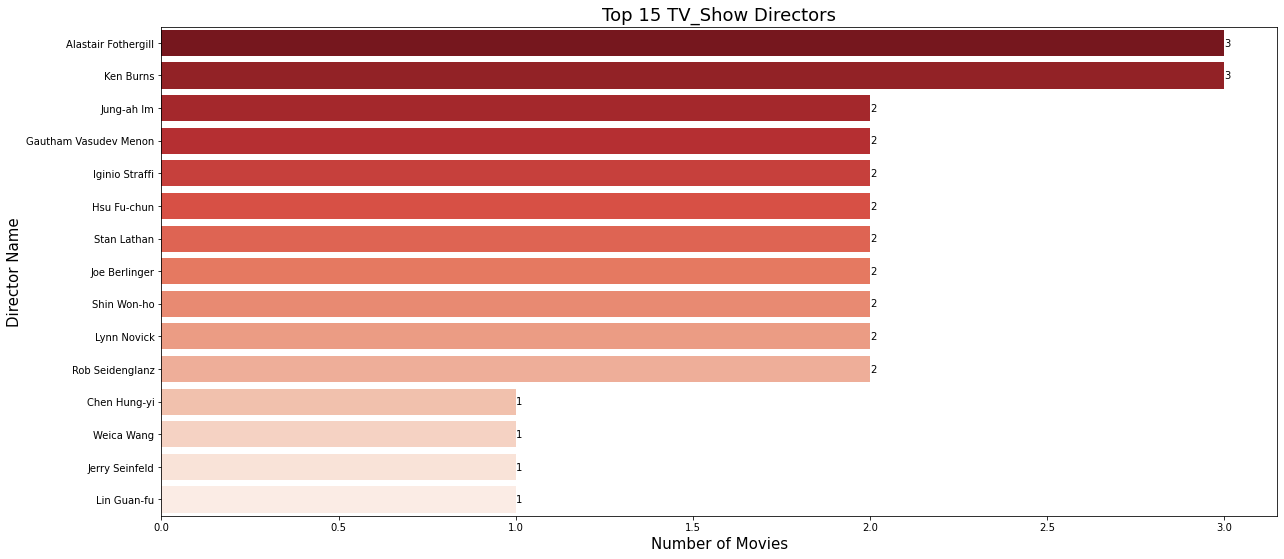

In [29]:
df_tv_show_director = df_tv_shows.drop(df_tv_shows[df_tv_shows['director'] == 'NoDataAvailable'].index)
director_list = df_tv_show_director['director'].str.split(', ')
director_count = {}
for directors in director_list:
    for director in directors:
        if director in director_count:
            director_count[director] += 1 
        else:
            director_count[director] = 1

df_tv_show_director = pd.DataFrame(director_count.values(), 
                                   index=director_count.keys(), 
                                   columns={'director_count'})
df_tv_show_director.sort_values(by='director_count', 
                                ascending=False, inplace=True) 
top_15_tv_show_director = df_tv_show_director.head(15)

plt.figure(figsize=(20, 9))
ax = sns.barplot(y=top_15_tv_show_director.index, 
                 x=top_15_tv_show_director['director_count'],
                 palette='Reds_r')
ax.bar_label(ax.containers[0])
plt.title('Top 15 TV_Show Directors', fontsize=18)
plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('Director Name', fontsize=15)
plt.show()


Among the top TV shows directors, notable names like Alastair Fothergill and Ken Burns lead with 3 TV shows each. However, renowned directors like Jerry Seinfeld and Weica Wang have directed only 1 TV show, indicating potential for diversification into more TV show projects.

**Top Movie Director Based on Video Length**

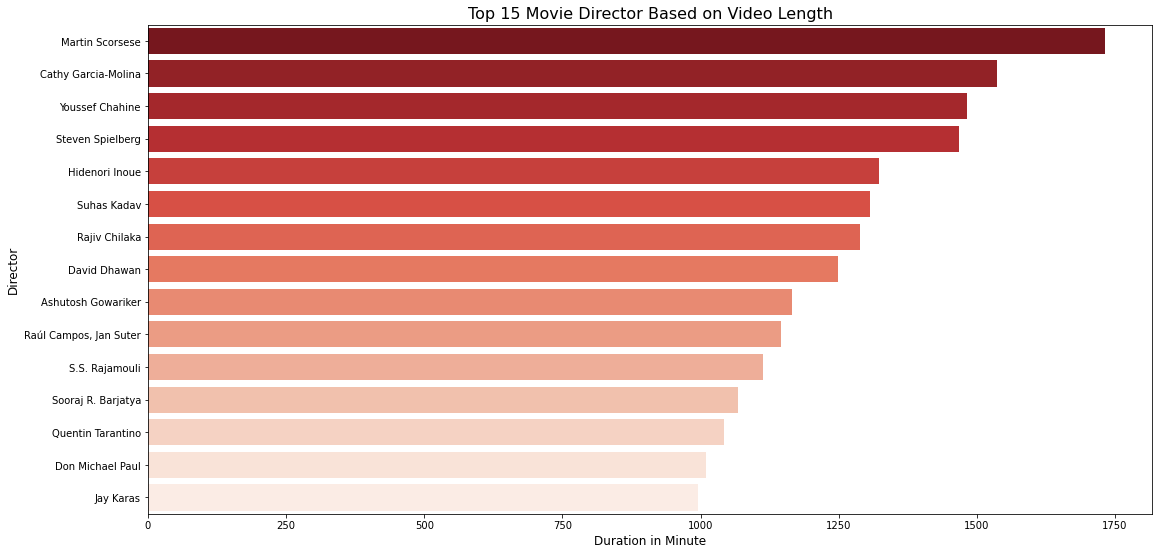

In [30]:
dir_min = df_movies.groupby('director').sum().sort_values('duration', ascending=False)
plt.figure(figsize=(18,9))
sns.barplot(y=dir_min.index[1:16], x=dir_min.duration[1:16], palette = 'Reds_r')
plt.title('Top 15 Movie Director Based on Video Length', fontsize = 16)
plt.ylabel('Director', fontsize=12)
plt.xlabel('Duration in Minute', fontsize=12)
plt.show()

Martin Scorsese and Cathy Garcia-Molina stand out with remarkably lengthy films, each exceeding 1500 minutes. Steven Spielberg follows closely, showcasing substantial storytelling prowess.

**Famous Movie Directors From 5 Leading Movie Making Country**

In [31]:
filtered_df = df_movies.dropna(subset=['country'])
filtered_df = filtered_df[filtered_df['country'] != 'NoDataAvailable']

top_4_countries = filtered_df['country'].value_counts().nlargest(4)

for country in top_4_countries.index:
    country_df = filtered_df[filtered_df['country'] == country]
    country_df = country_df[country_df['director'] != 'NoDataAvailable']  

    director_count = country_df['director'].value_counts().nlargest(10).sort_values()

    fig = px.bar(y=director_count.index, x=director_count.values, 
                 orientation='h', 
                 color=director_count.values,
                 color_continuous_scale=custom_palette_3,
                 labels={'x': 'Number of Shows Directed'}, 
                 title=f'Top 10 Movie Directors in {country}',
                )
    fig.update_traces(textposition='inside', textfont=dict(color='white'), 
                      selector=dict(type='bar'))
    fig.update_layout(title_font=dict(size=16, family='Verdana'), title_x=0.5, 
                      xaxis=dict(tickfont=dict(size=12), dtick=1, 
                                 gridcolor='#ffdab9', title='Number of Shows Directed'),
                      yaxis=dict(tickfont=dict(size=12), title='Director'),
                      plot_bgcolor='#ffffff', coloraxis_showscale=False)
    fig.show()

**Actors or Actresses Analysis**

**Top 15 Movie Actors or Actresses**

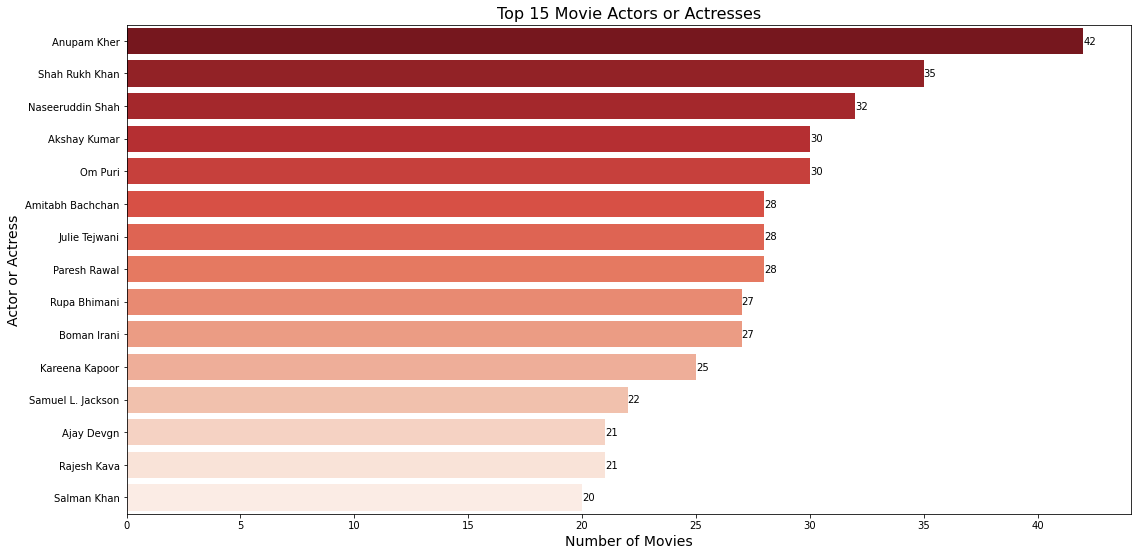

In [32]:
df_movies_cast = df_movies.drop(df_movies[df_movies['cast'] == 'NoDataAvailable'].index)
movie_cast_list = df_movies_cast['cast'].str.split(', ')
movie_cast_count = {}
for actors in movie_cast_list:
    for actor in actors:
        if actor in movie_cast_count:
            movie_cast_count[actor] += 1
        else:
            movie_cast_count[actor] = 1

df_movie_cast = pd.DataFrame(movie_cast_count.values(), 
                             index=movie_cast_count.keys(), 
                             columns={'actor Count'})
df_movie_cast.sort_values(by='actor Count', ascending=False, inplace=True)
top_15_movie_cast = df_movie_cast.head(15)

plt.figure(figsize=(18, 9))
ax = sns.barplot(y=top_15_movie_cast.index,
                 x=top_15_movie_cast['actor Count'],
                 palette='Reds_r')
ax.bar_label(ax.containers[0])
plt.title('Top 15 Movie Actors or Actresses', fontsize=16, loc='center')
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor or Actress', fontsize=14)
plt.show()


Anupam Kher leads with 42 movies, followed by Shah Rukh Khan with 35, indicating their significant presence in cinematic works. <br>
Naseeruddin Shah and Akshay Kumar share the spotlight with 32 and 30 performances, respectively.

**Top 15 TV Shows Actor or Actresses**

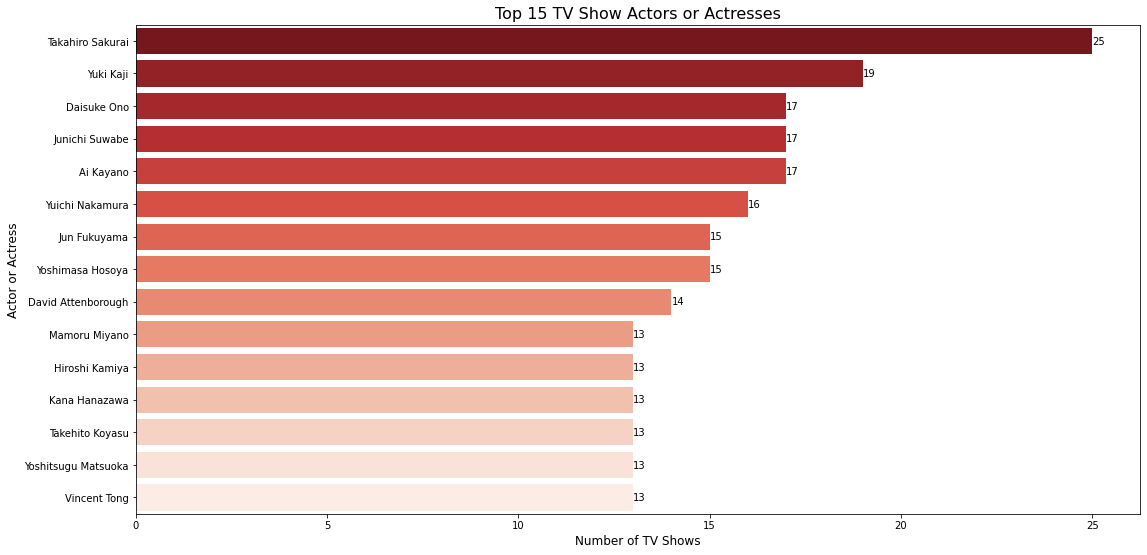

In [33]:
df_tv_show_cast = df_tv_shows.drop(df_tv_shows[df_tv_shows['cast'] == 'NoDataAvailable'].index)
tv_cast_list = df_tv_show_cast['cast'].str.split(', ')
tv_cast_count = {}
for cast_list in tv_cast_list:
    for actor in cast_list:
        if actor in tv_cast_count:
            tv_cast_count[actor] += 1
        else:
            tv_cast_count[actor] = 1

df_tv_cast = pd.DataFrame(tv_cast_count.values(), 
                          index=tv_cast_count.keys(), 
                          columns={'tv_show_count'})
df_tv_cast.sort_values(by='tv_show_count', ascending=False, inplace=True)
top_15_tv_cast = df_tv_cast.head(15)

plt.figure(figsize=(18, 9))
ax = sns.barplot(y=top_15_tv_cast.index,
                 x=top_15_tv_cast['tv_show_count'],
                 palette='Reds_r')
ax.bar_label(ax.containers[0])
plt.title('Top 15 TV Show Actors or Actresses', fontsize=16)
plt.xlabel('Number of TV Shows', fontsize=12)
plt.ylabel('Actor or Actress', fontsize=12)
plt.show()


Takahiro Sakurai, Yuki Kaji, and Daisuke Ono, lead in appearances, with Takahiro Sakurai topping the list at 25 TV shows.

**Top 10 Movie Actors or Actresses by Country**

In [34]:
bar_color ="#B21807"
countries_of_interest = ['USA', 'India', 'UK', 'Japan', 'Canada']

dfs = []
for country in countries_of_interest:
    country_movies = df_movies[df_movies['country'] == country]
    country_movies_cast = country_movies.drop(country_movies[country_movies['cast'] == 'NoDataAvailable'].index)

    country_cast_count = {}

    for index, row in country_movies_cast.iterrows():
        cast_list = row['cast'].split(', ')
        for actor in cast_list:
            if actor in country_cast_count:
                country_cast_count[actor] += 1
            else:
                country_cast_count[actor] = 1

    sorted_country_cast_count = dict(sorted(country_cast_count.items(), 
                                            key=lambda item: item[1], reverse=True))
    top_10_cast_df = pd.DataFrame(list(sorted_country_cast_count.items())[:10], 
                                  columns=['Actor', 'Count'])
    top_10_cast_df['Country'] = country

    dfs.append(top_10_cast_df)

top_10_cast_combined = pd.concat(dfs)

for country in countries_of_interest:
    country_df = top_10_cast_combined[top_10_cast_combined['Country'] == country]
    country_df = country_df[::-1]
    fig = px.bar(country_df, x='Count', y='Actor', 
                 orientation='h', 
                 title=f'{country} Top 10 Movie Actors or Actresses',
                 labels={'Count': 'Number of Movies', 
                         'Actor': 'Actor/Actress'},
                 color='Count',
                 color_continuous_scale=[(0, bar_color), (1, bar_color)]
                )
    fig.update_layout(title_font=dict(size=16, family='Verdana'), title_x=0.5, 
                      xaxis=dict( gridcolor='#ffdab9'),plot_bgcolor='#ffffff',
                      height=450, width=900, coloraxis_showscale=False)
    fig.show()

**Top 10 TV Shows Actors or Actresses by Country**

In [35]:
bar_color = '#B21807'
countries_of_interest = ['Japan', 'USA', 'UK', 'S. Korea']
dfs = []

for country in countries_of_interest:
    country_tv_shows = df_tv_shows[df_tv_shows['country'] == country]
    country_tv_shows_cast = country_tv_shows.drop(country_tv_shows[country_tv_shows['cast'] == 'NoDataAvailable'].index)

    country_cast_count = {}

    for index, row in country_tv_shows_cast.iterrows():
        cast_list = row['cast'].split(', ')
        for actor in cast_list:
            if actor in country_cast_count:
                country_cast_count[actor] += 1
            else:
                country_cast_count[actor] = 1

    sorted_country_cast_count = dict(sorted(country_cast_count.items(), 
                                            key=lambda item: item[1], reverse=True))
    top_10_cast_df = pd.DataFrame(list(sorted_country_cast_count.items())[:10], 
                                  columns=['Actor', 'Count'])
    top_10_cast_df['Country'] = country
    dfs.append(top_10_cast_df)
    
top_10_cast_combined = pd.concat(dfs)

for country in countries_of_interest:
    country_df = top_10_cast_combined[top_10_cast_combined['Country'] == country]
    country_df = country_df[::-1]
    fig = px.bar(country_df, x='Count', y='Actor', 
                 orientation='h', 
                 title=f'{country} Top 10 TV Show Actors or Actresses',
                 labels={'Count': 'Number of Shows', 'Actor': 'Actor/Actress'},
                 color='Count',
                 color_continuous_scale=[(0, bar_color), (1, bar_color)]
                )
    fig.update_layout(title_font=dict(size=16, family='Verdana'), title_x=0.5, 
                      xaxis=dict( gridcolor='#ffdab9'),plot_bgcolor='#ffffff',
                      height=450, width=900,coloraxis_showscale=False)
    fig.show()

**Genre Analysis**

**Top Genre in Movies**

In [36]:
# Filter movies and extract genres
df_movies = df[df['type'] == 'Movie']
movie_genre_list = df_movies.listed_in.str.split(', ')
movie_gen_list = {}
for genres in movie_genre_list:
    for genre in genres:
        if genre in movie_gen_list:
            movie_gen_list[genre] += 1
        else:
            movie_gen_list[genre] = 1

# Create DataFrame for movie genres
df_movie_genre = pd.DataFrame(movie_gen_list.values(), index=movie_gen_list.keys(),
                              columns={'Genres_Counts'})
df_movie_genre.sort_values(by='Genres_Counts', ascending=True, inplace=True)
top_15_movie_genre = df_movie_genre.tail(15)

# Plot top 15 movie genres
fig = px.bar(x=top_15_movie_genre['Genres_Counts'],
             y=top_15_movie_genre.index,
             text=top_15_movie_genre['Genres_Counts'],
             orientation='h',
             title='Top 15 Genres in Movies',
             labels={'x': 'Number of Movies', 'y': 'Genre'},
             width=900,
             height=650,
             color_discrete_sequence=custom_palette_2)

# Customize layout
fig.update_layout(title_font_size=16, title_x=0.5,
                  xaxis_title_font_size=14,
                  yaxis_title_font_size=14,
                  showlegend=False,
                  plot_bgcolor='#ffffff')

fig.update_traces(textposition='outside', textfont=dict(size=11))
fig.show()


**Top Genre in TV Shows**

In [37]:
# Extract TV show data and genre information
df_tv_shows = df[df['type'] == 'TV Show']
tv_shows_genre_list = df_tv_shows.listed_in.str.split(', ')
tv_shows_gen_list = {}
for genres in tv_shows_genre_list:
    for genre in genres:
        if genre in tv_shows_gen_list:
            tv_shows_gen_list[genre] += 1
        else:
            tv_shows_gen_list[genre] = 1

# Create DataFrame for TV show genres
df_tv_shows_genre = pd.DataFrame(tv_shows_gen_list.values(), index=tv_shows_gen_list.keys(), columns={'Genres_Counts'})
df_tv_shows_genre.sort_values(by='Genres_Counts', ascending=True, inplace=True)
top_15_tv_shows_genre = df_tv_shows_genre.tail(15)

# Plot top 15 genres in TV shows
fig = px.bar(x=top_15_tv_shows_genre['Genres_Counts'],
             y=top_15_tv_shows_genre.index,
             text=top_15_tv_shows_genre['Genres_Counts'],
             orientation='h',
             title='Top 15 Genres in TV Shows',
             labels={'x': 'Number of TV Shows', 'y': 'Genre'},
             width=900,
             height=650,
             color_discrete_sequence=custom_palette_2)

# Customize layout
fig.update_layout(title_font_size=16, title_x=0.5,
                  xaxis_title_font_size=14,
                  yaxis_title_font_size=14,
                  showlegend=False,
                  plot_bgcolor='#ffffff')

fig.update_traces(textposition='outside', textfont=dict(size=11))
fig.show()


**Diversity in Genre Preference:** While **International Movies** and **International TV Shows** both feature prominently, the movie genre encompasses a broader range, including **Dramas**, **Comedies**, and **Documentaries**, indicating a diverse viewership interest. <br>

**Specificity in TV Genres:** Conversely, TV shows exhibit a more specific categorization, with genres like **TV Dramas**, **Crime TV Shows**, and **Reality TV** standing out, suggesting a preference for more targeted content experiences among viewers.

**Single Vs Multiple Genres**

In [38]:
listed_type = df[['type', 'listed_in']]
listed_type['num_genre'] = listed_type['listed_in'].apply(lambda x: len(x.split(',')))
listed_type['bin_genre'] = listed_type['num_genre'].apply(lambda x: 1 if x > 2 else 0)

tv_percent = listed_type[listed_type['type'] == 'TV Show']['bin_genre'].value_counts(normalize=True) * 100
movie_percent = listed_type[listed_type['type'] == 'Movie']['bin_genre'].value_counts(normalize=True) * 100

fig_tv = px.pie(names=tv_percent.index,
                values=tv_percent.values,
                title='Single Vs Multiple Genres in TV Shows',
                width=500, height=500,
                color_discrete_sequence=px.colors.sequential.Reds_r, hole=0.55)

fig_tv.update_traces( legendgroup='bin_genre', labels=['Single Genre', 'Multiple Genre'])
fig_tv.update_layout(title_x=0.5)

fig_movie = px.pie(names=movie_percent.index,
                values=movie_percent.values,
                title='Single Vs Multiple Genres in Movies',
                width=500, height=500,
                color_discrete_sequence=px.colors.sequential.Reds_r, hole=0.55)

fig_movie.update_traces( legendgroup='bin_genre', labels=['Single Genre', 'Multiple Genre'])
fig_movie.update_layout(title_x=0.5)

fig_tv.show()
fig_movie.show()


Movies showcase 60.71% single-genre dominance, while TV shows present a balanced split, with 50.67% favoring single genres and 49.33% embracing multiple genres

**Rating Analysis**

**TV-MA**:This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.<br>
**TV-14**:This program contains some material that many parents would find unsuitable for children under 14 years of age.<br>
**R**:Under 17 requires accompanying parent or adult guardian,Parents are urged to learn more about the film before taking their young children with them.<br>
**R**:Under 17 requires accompanying parent or adult guardian,Parents are urged to learn more about the film before taking their young children with them.<br>
**PG-13**:Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.<br>
**NR or UR**:If a film has not been submitted for a rating or is an uncut version of a film that was submitted.<br>
**PG:**Some material may not be suitable for children,May contain some material parents might not like for their young children.<br>
**TV-Y7**:This program is designed for children age 7 and above.<br>
**TV-G**:This program is suitable for all ages.<br>
**TV-Y**:Programs rated TV-Y are designed to be appropriate for children of all ages. The thematic elements portrayed in programs with this rating are specifically designed for a very young audience, including children ages 2-6.<br>
**TV-Y7-FV**:is recommended for ages 7 and older, with the unique advisory that the program contains fantasy violence.<br>
**G**:All ages admitted. Nothing that would offend parents for viewing by children.<br>
**NC-17**:No One 17 and Under Admitted. Clearly adult. Children are not admitted.

In [39]:
df['rating'].value_counts()

TV-MA       3214
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

Rename rating column based on ages

In [40]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
            }
df['ages'] = df['rating'].replace(ratings_ages)

**Content Ages Distribution**

In [41]:
ages_count = df['ages'].value_counts()

fig = px.pie(df, values=ages_count, 
             names=ages_count.index,
             labels=ages_count.index, 
             color_discrete_sequence=px.colors.sequential.RdBu,  
             hole=0.55,
             title='Ages Distribution')

fig.update_traces(textposition='inside', textinfo='percent+value+label', 
                  insidetextfont=dict(color='white', size=13))
fig.add_annotation(x=0.5, y=0.5, text='Ages Distribution',
                    font=dict(size=20, family='Verdana', color='black'),
                    showarrow=False)

fig.update_layout(showlegend=False, title_x=0.5)
fig.show()

Among content, Adults comprise 46.54%, while Teens account for 30.09%. Older Kids and Kids constitute 16.92% and 6.45%, respectively. Recommendations may prioritize adult and teen-oriented content.

**TV Show Ages Distribution**

In [42]:
df_tv_shows = df[df['type'] == 'TV Show']
df_movies = df[df['type'] == 'Movie']
tv_show_count = df_tv_shows.ages.value_counts()
movie_count = df_movies.ages.value_counts()

plt.figure(figsize=(13,13))
fig = px.pie(df,values = tv_show_count, 
             names = tv_show_count.index,
             labels= tv_show_count.index, 
             color_discrete_sequence=px.colors.sequential.RdBu,  
             hole = 0.55,
             title='Ages Distribution by TV Shows')
fig.update_traces(textposition ='inside',textinfo='percent+value+label',
                  insidetextfont=dict(color='white', size=14))
fig.add_annotation(x= 0.5, y = 0.5,text = 'TV Show',
                    font = dict(size=25,family='Verdana', color='black'),
                    showarrow = False)
fig.update_layout(showlegend=False, title_x=0.5)
fig.show()

<Figure size 936x936 with 0 Axes>

Adults dominate TV Show viewership at 43.12%, followed by Teens at 27.39%. Older Kids and Kids make up 19.39% and 10.09% of the audience, respectively.

**Movies Ages Distribution**

In [43]:
plt.figure(figsize=(13,13))
fig = px.pie(df,values = movie_count, 
             names = movie_count.index,
             labels= movie_count.index, 
             color_discrete_sequence=px.colors.sequential.RdBu,  
             hole = 0.55,
             title='Ages Distribution by Movies')
fig.update_traces(textposition ='inside',textinfo='percent+value+label', 
                  insidetextfont=dict(color='white', size=14))
fig.add_annotation(x= 0.5, y = 0.5,text = 'Movie',
                    font = dict(size=25,family='Verdana', color='black'),
                    showarrow = False)

fig.update_layout(showlegend=False, title_x=0.5)
fig.show()

<Figure size 936x936 with 0 Axes>

Movies predominantly cater to Adults (48.03%), followed by Teens (31.27%). Older Kids constitute a significant portion (15.84%), while Kids represent a smaller audience (4.86%)."

**Ages Distribution by Top Contents Making Country**

In [44]:
filtered_df = df[~(df['country'] == 'NoDataAvailable')]
top_10_countries = filtered_df['country'].value_counts().nlargest(10)

for country in top_10_countries.index:
    country_df = df[df['country'] == country]

    ages_count = country_df['ages'].value_counts()

    fig = px.pie(ages_count, values=ages_count.values, 
                 names=ages_count.index,
                 labels=ages_count.index, 
                 color_discrete_sequence=px.colors.sequential.RdBu,  
                 hole=0.55,
                 title=f'Content Ages Distribution in {country}')

    fig.update_traces(textposition='inside', textinfo='percent+value+label', 
                      insidetextfont=dict(color='white', size=13))

    fig.add_annotation(x=0.5, y=0.5, text=f'{country} Content',
                        font=dict(size=20, family='Verdana', color='black'),
                        showarrow=False)

    fig.update_layout(showlegend=False, title_x=0.5)
    fig.show()


- In the USA, the majority of content is targeted towards adults (49%), while in India, the focus is more evenly spread across teens (56%).
-  Spain has the highest percentage of Adults at 81.8% and Australia for Older Kids at 28%.
- Japan has the lowest percentage of Kids at 1.16%.

**Month, Day and Weekday Analysis**

**Movies and TV Shows Added Across the Months**

Extract year, month, day, and weekday information from the 'date_added' column.

In [45]:
from datetime import datetime
from dateutil.parser import parse
df['year_added'] = df['date_added'].dt.year
df['year_added'] = df['year_added'].astype('Int64')
df['month_added'] = df['date_added'].dt.month
df['month_added'] = df['month_added'].astype('Int64')
df['day_added'] = df['date_added'].dt.day
df['day_added'] = df['day_added'].astype('Int64')
df['Weekday_added'] = df['date_added'].apply(lambda x: parse(str(x)).strftime('%A'))

In [46]:
df_month = df.groupby(['month_added', 'type']).agg({'title':'nunique'}).reset_index()

month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df_month['month_added'] = df_month['month_added'].map(month_names)
fig = px.bar(df_month, x='month_added', y='title', color='type',
             barmode='group', 
             title='Movies and TV Shows Added Across the Months',
             labels={'month_added': 'Month', 'title': 'Number of Titles'},
             color_discrete_sequence=custom_palette_4
            )

fig.update_layout(font=dict(size=12, family='Verdana'), title_font=dict(size=16, family='Verdana'), title_x=0.5, 
                  xaxis=dict(tickfont=dict(size=12), tickmode='array', tickvals=list(month_names.values())), 
                  yaxis=dict(gridcolor='#ffdab9'),
                  plot_bgcolor='#ffffff', coloraxis_showscale=False)

fig.show()

Generally, movie additions peak in July and December, suggesting potential seasonal trends or strategic release patterns. In contrast, TV show additions spike in July, with noticeable dips in May and November. 

**Movies and TV Shows Added Across Each Day**

In [47]:
df_day = df.groupby(['day_added']).agg({'title':'nunique'}).reset_index()

fig = px.bar(df_day, x='day_added', y='title', 
             title='Movies and TV Shows Added Across Each Day',
             labels={'day_added': 'Day Added', 'title': 'Number of Titles'},
             color_discrete_sequence=custom_palette_2
             )

fig.update_layout(font=dict(size=12, family='Verdana'), title_font=dict(size=16, family='Verdana'), title_x=0.5, 
                  xaxis=dict( dtick=1),
                  yaxis=dict(gridcolor='#ffdab9', dtick=300), plot_bgcolor='rgba(0,0,0,0)', coloraxis_showscale=False,
                  xaxis_title='Day', yaxis_title='Number of Titles', 
                  bargap=0.2, width=1000, height=600,
                  showlegend=False)
fig.show()

While peaks are observed on days 1 and 15, possibly indicating the beginning and middle of the month, day 2 reflects a stark drop, suggesting a possible follow-up effect.

**Movies and TV Shows Added Across Weekdays**

In [48]:
df_weekday = df.groupby(['Weekday_added']).agg({'title':'nunique'}).reset_index()

fig = px.bar(df_weekday, x='Weekday_added', y='title', 
             title='Movies and TV Shows Added Across Weekdays',
             labels={'Weekday_added': 'Weekday Added', 'title': 'Number of Titles'},
             color_discrete_sequence=custom_palette_2
             )

fig.update_layout(font=dict(size=12, family='Verdana'), title_font=dict(size=16, family='Verdana'), title_x=0.5, 
                  yaxis=dict(gridcolor='#ffdab9', dtick=300),
                  plot_bgcolor='rgba(0,0,0,0)', coloraxis_showscale=False,
                  xaxis_title='Weekday', yaxis_title='Number of Titles', 
                  bargap=0.3, width=800, height=700,
                  showlegend=False)
fig.show()

Movies and TV shows added across weekdays reveals Friday as dominant, suggesting weekends witness fewer additions, while weekdays exhibit more consistent distributions, notably Thursday, with varied volumes.

**Word Frequency Analysis**

**Most Common Words in Titles**

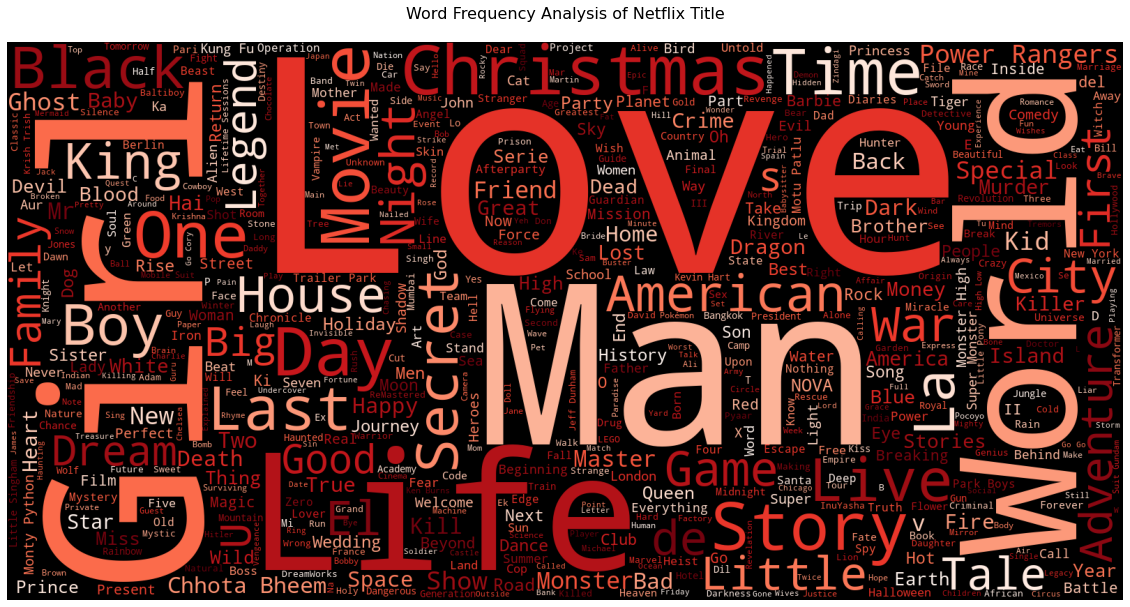

In [49]:
plt.figure(figsize=(20,20))
wordcloud = WordCloud(max_words=1000, min_font_size=10,
               height=800,width=1600,background_color='Black', 
               colormap='Reds_r').generate(' '.join(df['title']))
plt.title('Word Frequency Analysis of Netflix Title\n', 
          fontsize=16, weight=400, color='Black')
plt.axis('off')
plt.imshow(wordcloud)

**Most Common Words in Descriptions**

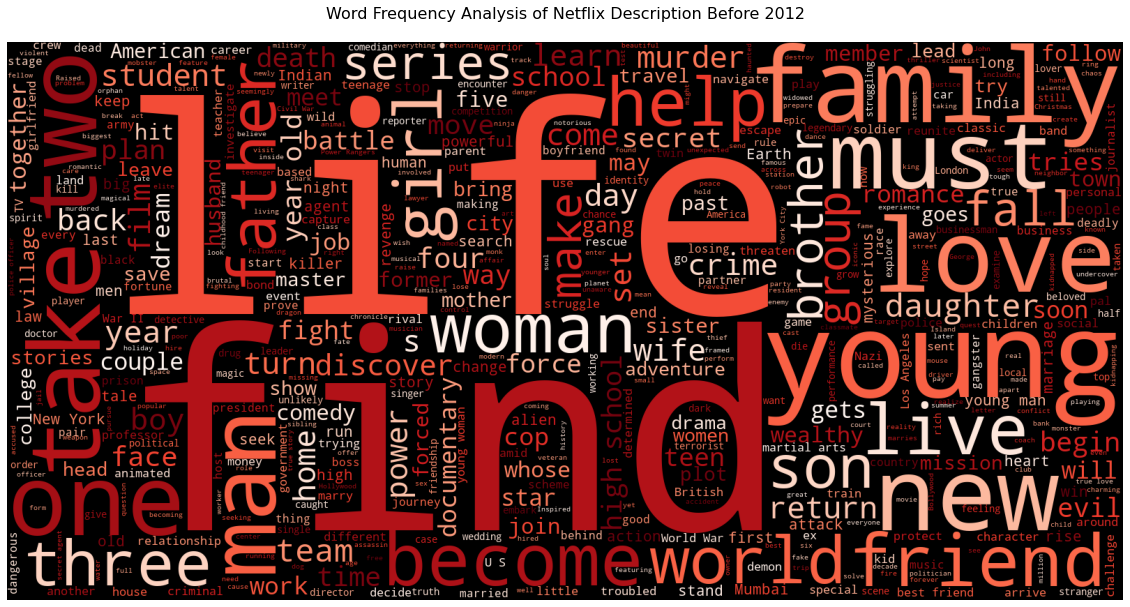

In [50]:
plt.figure(figsize=(20,20))
wordcloud = WordCloud(max_words=1000, min_font_size=10,
               height=800,width=1600,background_color='Black', 
               colormap='Reds_r').generate(' '.join(df[df['release_year'] < 2012]['description']))
plt.title('Word Frequency Analysis of Netflix Description Before 2012\n', 
          fontsize=16, weight=400, color='Black')
plt.axis('off')
plt.imshow(wordcloud)

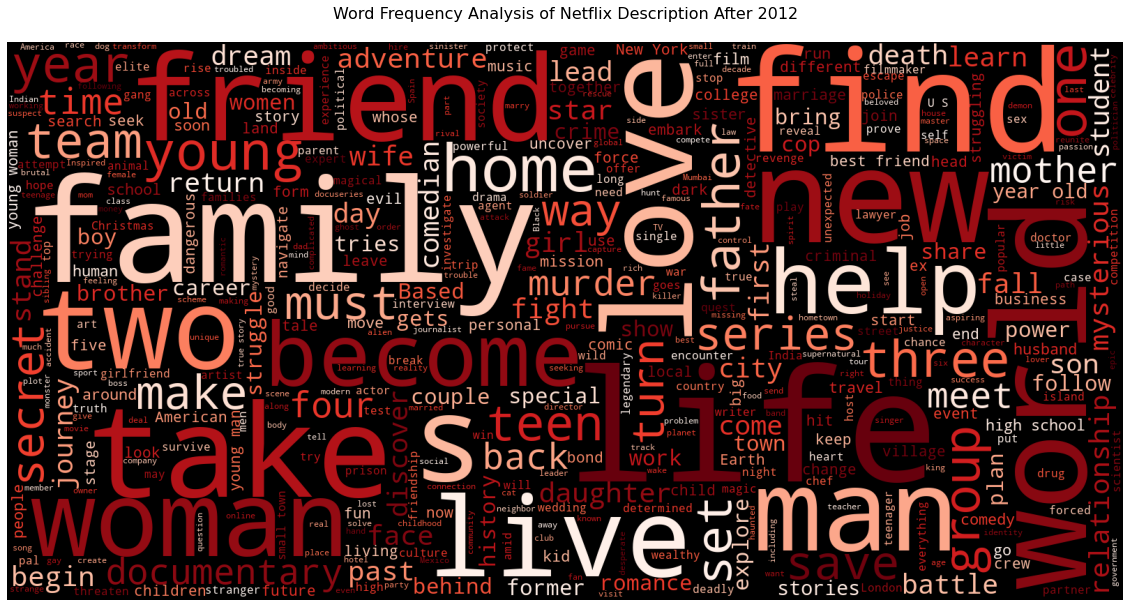

In [51]:
plt.figure(figsize=(20,20))
wordcloud = WordCloud(max_words=1000, min_font_size=10,
               height=800,width=1600,background_color='Black', 
               colormap='Reds_r').generate(' '.join(df[df['release_year'] >= 2012]['description']))
plt.title('Word Frequency Analysis of Netflix Description After 2012\n', 
          fontsize=16, weight=400, color='Black')
plt.axis('off')
plt.imshow(wordcloud)

**Common Words** <br>
**Life Theme**: "Life" emerges as the most frequent theme in Netflix movie descriptions, indicating a focus on the human condition and life's experiences.<br>
**Love and Family**: "Love" and "family" are also prevalent, highlighting the popularity of movies centered around these themes.<br>
"New" Indicates fresh or innovative content and "Find" Implies discovery or exploration within the narrative.<br>

**Unique Words**:<br>
Before 2012, "young" in Netflix content suggests a recurring theme youth experiences, appealing to a younger audience and After 2012,"Take" Suggests a unique perspective or approach.

**20 Oldest TV Shows on Netflix**

In [52]:
oldest_tv_shows = df_tv_shows.sort_values(by='release_year').head(20)

oldest_tv_shows = oldest_tv_shows[['title', 'release_year']]
print(oldest_tv_shows.to_string(index=False))

                              title  release_year
  Pioneers: First Women Filmmakers*          1925
Five Came Back: The Reference Films          1945
Pioneers of African-American Cinema          1946
The Twilight Zone (Original Series)          1963
             The Andy Griffith Show          1967
   Monty Python's Fliegender Zirkus          1972
       Monty Python's Flying Circus          1974
                         Dad's Army          1977
                           El Chavo          1979
                      Ninja Hattori          1981
                           Robotech          1985
                        Saint Seiya          1986
                         Shaka Zulu          1986
                          High Risk          1988
                  Highway to Heaven          1988
  The Super Mario Bros. Super Show!          1989
                Pee-wee's Playhouse          1990
           Ken Burns: The Civil War          1990
                         Twin Peaks          1990


"Pioneers: First Women Filmmakers*" suggests groundbreaking cinema dating back to 1925. Noteworthy shows like "The Twilight Zone (Original Series)" (1963) and "The Andy Griffith Show" (1967) epitomize classic television, while "Monty Python's Flying Circus" (1974) stands out for its timeless comedy. <br>
The list encompasses a diverse range of genres, spanning from "Ninja Hattori" (1981) to "Highway to Heaven" (1988), offering something for every viewer.

**20 Oldest Movies on Netflix**

In [53]:
oldest_movies = df_movies.sort_values(by='release_year').head(20)

oldest_movies = oldest_movies[['title', 'release_year']]
print(oldest_movies.to_string(index=False))

                                           title  release_year
                                  Prelude to War          1942
                            The Battle of Midway          1942
   Undercover: How to Operate Behind Enemy Lines          1943
                 WWII: Report from the Aleutians          1943
              Why We Fight: The Battle of Russia          1943
The Memphis Belle: A Story of a\nFlying Fortress          1944
                                Tunisian Victory          1944
                               The Negro Soldier          1944
                        Nazi Concentration Camps          1945
                                      San Pietro          1945
                         Know Your Enemy - Japan          1945
                              Let There Be Light          1946
                                     Thunderbolt          1947
                                 The Blazing Sun          1954
                                 White Christmas       

"Rebel Without a Cause" (1955) and "White Christmas" (1954) reflect classic Hollywood glamour, while "Prelude to War" (1942) delves into historical significance. <br>
Films like "The Battle of Midway" (1942) and "Tunisian Victory" (1944) offer gripping wartime narratives, contrasting with post-war exploration in "Forbidden Planet" (1956). "The Negro Soldier" (1944) and "Know Your Enemy - Japan" (1945) provide insights into historical perspectives. Each film encapsulates a unique era, offering diverse viewing experiences.

**Recommendation System**

Various techniques used in recommendation systems, such as Collaborative Filtering, Content-Based Filtering, and Hybrid Recommendation Systems. Each technique aims to predict or recommend products, such as movies or music, to consumers. We specifically focuses on Content-Based Filtering.

**Multiple Content Based Recommendation System**

In [54]:
pred_df = df.copy()
content_columns = ['title', 'type', 'director', 'cast', 'country', 
                   'listed_in', 'description', 'ages']
pred_df = pred_df[content_columns]

pred_df['text'] = pred_df['title'] + " " + pred_df['type'] + " " + \
                          pred_df['director'] + " " + pred_df['cast'] + " " + \
                          pred_df['country'] + " " + pred_df['listed_in'] + " " + \
                          pred_df['description'] + " " + pred_df['ages']

# Clean text content
pred_df['text'] = pred_df['text'].apply(lambda x: x.replace(',', " ")
                                                        .replace('&', " ")
                                                        .replace('-', "")
                                                        .replace('.', " ")
                                                        .lower())

In [55]:
pred_df = df.copy()
content_columns = ['title', 'type', 'director', 'cast', 'country', 
                   'listed_in', 'description', 'ages']
pred_df = pred_df[content_columns]

pred_df['text'] = pred_df['title'] + ' ' + pred_df['type'] + ' ' + \
                          pred_df['director'] + ' ' + pred_df['cast'] + ' ' + \
                          pred_df['country'] + ' ' + pred_df['listed_in'] + ' ' + \
                          pred_df['description'] + ' ' + pred_df['ages']

# Clean text content
pred_df['text'] = pred_df['text'].apply(lambda x: x.replace(',', ' ')
                                                        .replace('&', ' ')
                                                        .replace('-', '')
                                                        .replace('.', ' ')
                                                        .lower())

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

countvect = CountVectorizer() 
count_matrix = countvect.fit_transform(pred_df['text']) 
cosine_sim = cosine_similarity(count_matrix)

In [57]:
def recommend_me(my_title, n=10, verbose=True):
    n = min(n, 30)
    
    def get_title_from_index(index):
        return pred_df.loc[index, 'title']

    def get_index_from_title(title):
        return pred_df[pred_df['title'] == title].index.values[0]

    try:
        index_ = get_index_from_title(my_title)
        similar_titles = list(enumerate(cosine_sim[index_]))
        
        sorted_similar_titles = sorted(similar_titles, key=lambda x: x[1], 
                                       reverse=True)[1:]
        
        print(f'Top {n} Recommendations Based on "{my_title}":')
        
        for count, (title_index, similarity_score) in enumerate(sorted_similar_titles):
            if count >= n:
                break
            recommended_title = get_title_from_index(title_index)
            if verbose:
                print(f"{count + 1}. {recommended_title}")
    except IndexError:
        print('Please provide a title available for recommendations.')
    except KeyError:
        print('Please ensure the variables pred_df and cosine_sim are correctly defined.')

In [58]:
recommend_me('San Pietro',10)

Top 10 Recommendations Based on "San Pietro":
1. Creating an Army of the Dead
2. The Battle of Midway
3. Woodstock
4. The Power of Grayskull: The Definitive History of He-Man and the Masters of the Universe
5. Black Holes | The Edge of All We Know
6. The Legend of 420
7. The Last Days
8. Sad Hill Unearthed
9. InuYasha the Movie 3: Swords of an Honorable Ruler
10. The Last Resort


In [59]:
recommend_me('The Matrix',5)

Top 5 Recommendations Based on "The Matrix":
1. The Matrix Reloaded
2. The Matrix Revolutions
3. Jupiter Ascending
4. Cloud Atlas
5. The Lord of the Rings: The Return of the King


In [60]:
recommend_me('The Game', 10)

Top 10 Recommendations Based on "The Game":
1. The Do-Over
2. Born to Play
3. Martin Luther: The Idea that Changed the World
4. The 9th Precinct
5. The Happytime Murders
6. Biggie: I Got a Story to Tell
7. Untold: Malice at the Palace
8. Underworld: Rise of the Lycans
9. Creating an Army of the Dead
10. An Ordinary Man


In [61]:
recommend_me('A Night at the Roxbury', 3)

Top 3 Recommendations Based on "A Night at the Roxbury":
1. Night on Earth: Shot in the Dark
2. The Last Laugh
3. Mr. Deeds


Initially, we employed the TF-IDF method. However, applying TF-IDF solely on the content descriptions yielded unexpected results. This outcome might be attributed to the nature of the content descriptions, which were primarily summaries. Had the descriptions contained more comprehensive information about each movie, I believe this method would have demonstrated better performance.

Using multiple columns in the Cosine Similarity function, we achieve the best results. By incorporating data from various columns, such as title, director, cast, country, listed_in, description, and ages, the Cosine Similarity function can generate more accurate recommendations. This approach allows for a comprehensive analysis of the content, taking into account different aspects such as genre, plot, cast members, and production details.